In [2]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [123]:
data = pd.read_csv('data_4517_20260116.csv',encoding='CP949',dtype=str)

In [20]:
def RS_week(ticker):

    start = "2024-10-01"
    end = "2026-01-20"
    try:
        Kospi_prices = yf.download('SPY',start=start,end=end)['Close']['SPY']
        ETF_prices = yf.download(f'{ticker}',start=start,end=end)['Close'][f'{ticker}']

        weekly_return1 = Kospi_prices.pct_change(periods=5)[5:] * 100 
        weekly_return2 = ETF_prices.pct_change(periods=5)[5:] * 100

        weekly_return1.dropna(inplace=True)
        weekly_return2.dropna(inplace=True)

        RS = weekly_return2 - weekly_return1
        # RS_30 = RS[-10:]

        return RS
    
    except:
        print(ticker)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


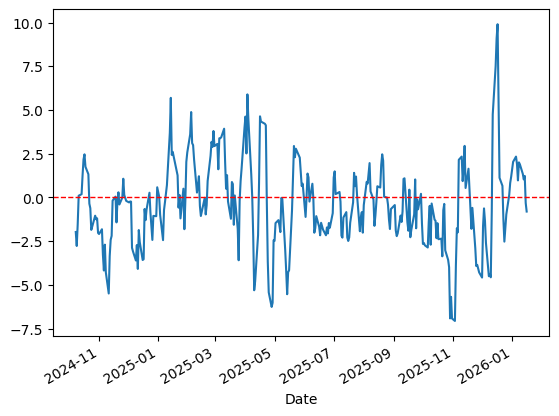

In [21]:
st = RS_week('LIN')

st.plot()

plt.axhline(0, color='red', linestyle='--', linewidth=1);

plt.show();

In [143]:
def aboveMA(ticker):

    start = "2023-09-01"
    end = "2026-01-20"

    Asset_prices = yf.download(f'{ticker}.KS',start=start,end=end)['Close'][f'{ticker}.KS']
    
    weekly_return2 = Asset_prices.pct_change(periods=5)[5:] 

    ma30 = weekly_return2.rolling(window=30).mean()[29:]

    return Asset_prices[-2:-1] , ma30
    # if Asset_prices[-1]>asset_30[-1]:
    #     return ticker
    # else:
    #     return None

In [146]:
prices , stock_price = aboveMA('103140')
print(prices + stock_price)

[*********************100%***********************]  1 of 1 completed

Date
2023-10-26              NaN
2023-10-27              NaN
2023-10-30              NaN
2023-10-31              NaN
2023-11-01              NaN
2023-11-02              NaN
2023-11-03              NaN
2023-11-06              NaN
2023-11-07              NaN
2023-11-08              NaN
2023-11-09              NaN
2023-11-10              NaN
2023-11-13              NaN
2023-11-14              NaN
2023-11-15              NaN
2023-11-16              NaN
2023-11-17              NaN
2023-11-20              NaN
2023-11-21              NaN
2023-11-22              NaN
2023-11-23              NaN
2023-11-24              NaN
2023-11-27              NaN
2023-11-28              NaN
2023-11-29              NaN
2023-11-30              NaN
2023-12-01              NaN
2023-12-04              NaN
2023-12-05              NaN
2023-12-06              NaN
2023-12-07              NaN
2023-12-08              NaN
2023-12-11              NaN
2023-12-12              NaN
2023-12-13              NaN
2023-12-14     

In [126]:
corp_code =data['corp_code'].dropna(ignore_index=True)
final_corp_list = []

for i in corp_code:
    ticker , st = RS_week(i)
    if st[-1]>0:
        m = aboveMA(ticker)
        if m:
            final_corp_list.append(m)
# print(final_corp_list)

df = pd.DataFrame(final_corp_list,columns=['corp_list'])
print(df)


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_10764\1656936315.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if st[-1]>0:
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
C:\Users\USER\AppData\Local\Temp\ipykernel_10764\1656936315.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if st[-1]>0:
[*********************100%***********************]  1 of 1 completed
[*********************100%***

    corp_list
0      282330
1      012030
2      000990
3      007700
4      014790
5      204320
6      003555
7      034220
8      003550
9      011070
10     066575
11     066570
12     010120
13     006260
14     229640
15     001120
16     456040
17     010955
18     010950
19     123700
20     001510
21     024070
22     012610
23     010130
24     002240
25     017040
26     030610
27     007690
28     002990
29     011785
30     011780
31     001210
32     073240
33     000270
34     008355
35     002350
36     353200
37     001680
38     047040
39     006650
40     003490
41     018500
42     000155
43     000157
44     454910
45     241560
46     000150
47     034020
48     336260
49     003160
50     024900
51     092780
52     023530
53     020150
54     286940
55     004990
56     005305
57     011170
58     090370
59     017180
60     009900
61     006805
62     006800
63     003000
64     001270
65     006740
66     062040
67     006400
68     028260
69     032830
70    


C:\Users\USER\AppData\Local\Temp\ipykernel_10764\1656936315.py:6: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  if st[-1]>0:


In [127]:
# final_corp_list = []

# for i in corp_list:
#     ticker = aboveMA(i)
#     if ticker:
#         final_corp_list.append(ticker)
# print(final_corp_list)

In [128]:
len(final_corp_list)

172

In [129]:
df = pd.DataFrame(final_corp_list,columns=['code_list'])

df[100:]

# for i in corp_list:
#     ticker,st = RS_week(i)
#     st.plot()

#     plt.axhline(0, color='red', linestyle='--', linewidth=1);

#     plt.show();

,code_list
100,010060
101,037270
102,105840
103,003470
104,084680
105,023800
106,023810
107,089590
108,002380
109,013870
